**Junnan Shimizu**

Spring 2022

CS 25X: Data Analysis and Visualization

# Lab 2: Matrix Transformations, Numpy and MatPlotLib
## Task 1: Setup, data import and projection

### 1a) Setup
1. Import numpy
2. Import matplotlib.pyplot

In [8]:
# Header

import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams['font.size'] = 15
plt.rcParams["figure.figsize"] = [12,4.5]

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1b) Projection
1. Read the toy dataset in 'data/gauss_3d.csv' using genfromtxt into a numpy matrix with 3 columns (X, Y, and Z). [numpy.genfromtxt](https://numpy.org/doc/1.18/reference/generated/numpy.genfromtxt.html)
2. Create a figure with 3 subplots, one for every possible combination of the dataset's dimensions (X vs Y, Y vs Z, and Z vs X). Each of these plots shows a different 2D __projection__ of the 3D dataset (each column is a different dimension). 
  - Remember pyplot? [pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) 
  - Remember subplots?  [pyplot.subplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) 
  
3. Make sure each subplot has a title

Text(0.5, 1.0, 'Z vs X')

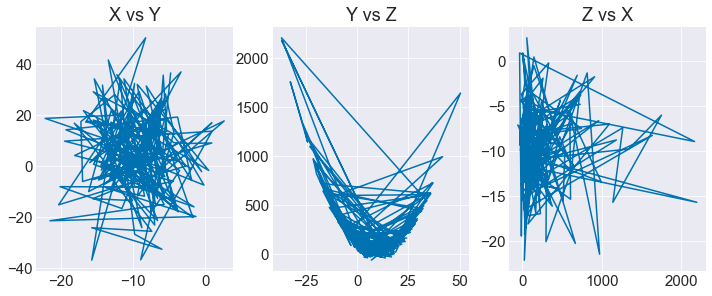

In [9]:
data = np.genfromtxt("data/gauss_3d.csv", delimiter=",")

x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

plot_one = plt.subplot(1, 3, 1)
plt.plot(x, y)
plot_one.set_title("X vs Y")

plot_two = plt.subplot(1, 3, 2)
plt.plot(y, z)
plot_two.set_title("Y vs Z")

plot_three = plt.subplot(1, 3, 3)
plt.plot(z, x)
plot_three.set_title("Z vs X")

### 1c) Prepare data for transformation matrices
We need to add a column of 1s to our dataset.
1. Create a matrix of ones of the correct dimensions. [numpy.ones](hhttps://numpy.org/doc/1.18/reference/generated/numpy.ones.html)
2. Add the new column to the imported data. [numpy.hstack](https://numpy.org/doc/1.18/reference/generated/numpy.hstack.html)


In [10]:
ones = np.ones(shape=([np.shape(data)[0], 1]))
data = np.hstack((data, ones))

## Task 2: Translation

### 2a) Create the Translation Matrix

<img src="img/Translation-Matrix2.png" align="right"/>

<i>Image: Example of translation matrix multiplied with a vector</i>

1. Design a transformation matrix that translates the dataset
  - +25 units in the Y direction  (t<sub>y</sub>)
  - -1000 units in the Z direction (t<sub>z</sub>)
  - Identity Matrix: [eye](https://numpy.org/doc/1.18/reference/generated/numpy.eye.html)
  - Print your matrix


In [11]:
id_matrix = np.eye(4)
id_matrix[0, 3] = 25
id_matrix[2, 3] = -1000
print(id_matrix)

[[    1.     0.     0.    25.]
 [    0.     1.     0.     0.]
 [    0.     0.     1. -1000.]
 [    0.     0.     0.     1.]]


### 2b) Translate Data and Visualize Results

2. Multiply your transformation matrix with the dataset using matrix multiplication and transposed matrices
  - m @ n or [matmul](https://numpy.org/doc/1.18/reference/generated/numpy.matmul.html) 
  - [transpose](https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T)
3. Create a figure with 3 subplots, graph the original data and translated results for all 3 possible pairs of axes. Each subplot should have 2 datasets graphed on it, the original data and the translated data in different colors.
  - <i>You can implement this as a function. You'll be repeating this visualization with different transformation matrices.</i>
  - Each subplot should have a title
  - The plot should include a legend labeling which color is which dataset.

Text(0.5, 1.0, 'Z vs X')

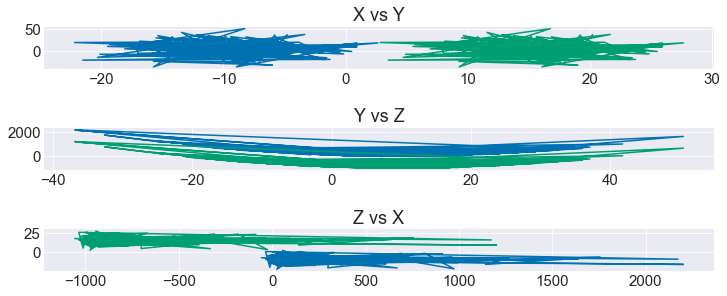

In [12]:
tdata = np.transpose(data)
result = id_matrix @ tdata
result = np.transpose(result)

tx = result[:, 0]
ty = result[:, 1]
tz = result[:, 2]

plot_one = plt.subplot(5, 1, 1)
plt.plot(x, y)
plt.plot(tx, ty)
plot_one.set_title("X vs Y")

plot_three = plt.subplot(5, 1, 3)
plt.plot(y, z)
plt.plot(ty, tz)
plot_three.set_title("Y vs Z")

plot_five = plt.subplot(5, 1, 5)
plt.plot(z, x)
plt.plot(tz, tx)
plot_five.set_title("Z vs X")

## Task 3: Scale

### 3a) Create a Scaling Matrix

<img src="img/Scaling-Matrix2.png" align="right"/>

<i>Image: Example of translation matrix multiplied with a vector</i>

1. Design a transformation matrix that scales the dataset
  - by 3 in the X axis
  - by 0.1 in the Z axis
  - Identity Matrix: [eye](https://numpy.org/doc/1.18/reference/generated/numpy.eye.html)
  - Print the matrix

In [13]:
scale_matrix = np.eye(4)
scale_matrix[0, 0] = 3
scale_matrix[2, 2] = .1
print(scale_matrix)

[[3.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  0.1 0. ]
 [0.  0.  0.  1. ]]


### 3b) Scale Data and Visualize the Results

2. Multiply your transformation matrix with the dataset using matrix multiplication and transposed matrices
  - m @ n or [matmul](https://numpy.org/doc/1.18/reference/generated/numpy.matmul.html) 
  - [transpose](https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T)
3. Create a figure with 3 subplots, graph the original data and scaled results for all 3 possible pairs of axes. Each subplot should have 2 datasets graphed on it, the original data and the scaled data in different colors.
  - <i>If you implemented a function in the previous step, you can use it here.</i>
  - Each subplot should have a title
  - The plot should include a legend labeling which color is which dataset.

Text(0.5, 1.0, 'Z vs X')

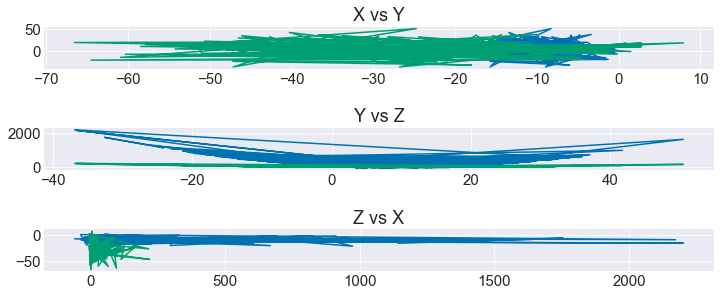

In [14]:
scaled_data = scale_matrix @ tdata
scaled_data = np.transpose(scaled_data)

tx = scaled_data[:, 0]
ty = scaled_data[:, 1]
tz = scaled_data[:, 2]

plot_one = plt.subplot(5, 1, 1)
plt.plot(x, y)
plt.plot(tx, ty)
plot_one.set_title("X vs Y")

plot_three = plt.subplot(5, 1, 3)
plt.plot(y, z)
plt.plot(ty, tz)
plot_three.set_title("Y vs Z")

plot_five = plt.subplot(5, 1, 5)
plt.plot(z, x)
plt.plot(tz, tx)
plot_five.set_title("Z vs X")